# GEOMETRIC BROWNIAN MOTION

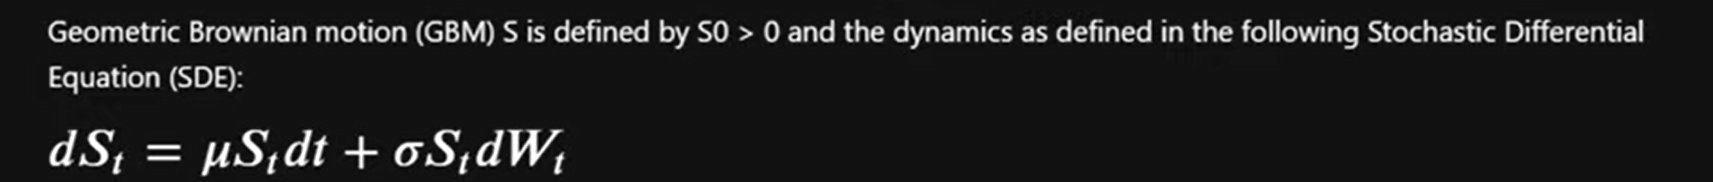

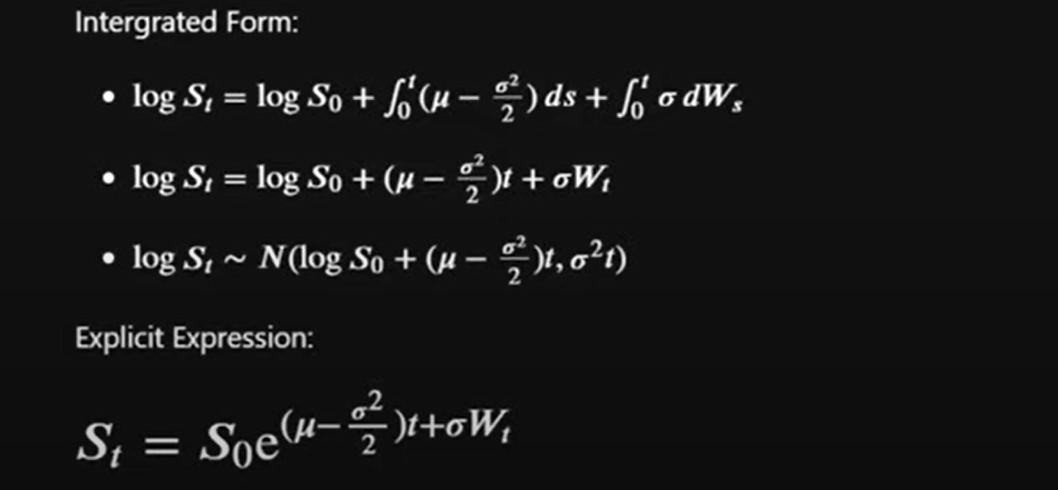

In [48]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# DARK Monokai Theme for jupyter notebook
###################################################################################################
# from jupyterthemes import get_themes
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('monokai')
# ####################################################################################################

In [58]:
# reminder -axis of numpy example 
np.array([[2,3], [4,6]]).cumprod(axis=0)

array([[ 2,  3],
       [ 8, 18]], dtype=int32)

In [59]:
class GBM:
    
    def simulate_GBM(mu =0.1, n = 1000, T=1, S0 = 100, sigma = 0.30, paths = 100):
        """
        mu = 0.1 #drfit coeeffient
        n = 1000 #number of steps
        T=1 #time in years
        S0 = 100 #intial stock price
        sigma =0.3 #volatilty
        paths = 1000
        
        returns (n+1 data points per path of a GBM, first value is S0)
        """
        
        dt = T/n #each time of a step
        
        #Weiner process : ~Normal Distribution
        Wt = np.random.normal(0, np.sqrt(dt), size=(paths,n)).T
        
        #Explicit form of GBM simulation for `paths` - paths and `n` steps per year
        St = np.exp(
                (mu - (sigma**2)/2)*dt + (sigma*Wt)
            )
        # inclusing array of 1's to start with, thus to multiply by So.
        St = np.vstack([np.ones(paths), St])
        
        #multiply So thourgh the cummulative product of GBM simulated paths. (axis=0)
        St = S0*St.cumprod(axis=0)
        
        #array of steps in for the period : n*T
        time_steps=np.linspace(0, T, n+1)
        
        return(St, time_steps)
        
        
    
    
    
    

In [60]:
St,time_steps = GBM.simulate_GBM(mu =0.1, n = 1000, T=1, S0 = 100, sigma = 0.30, paths = 100)

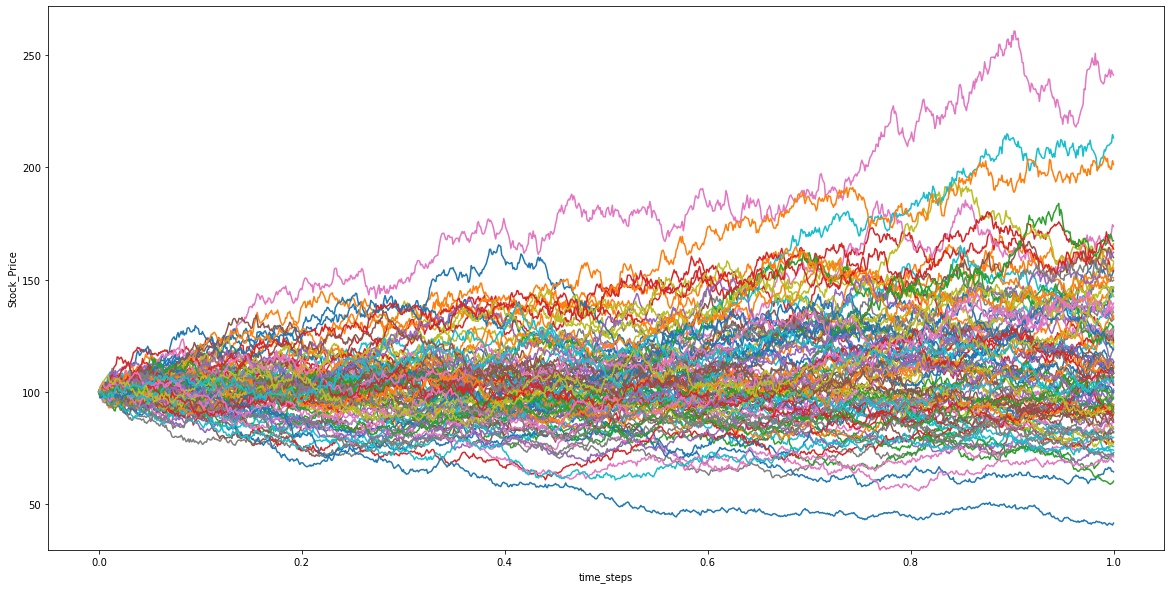

In [61]:
#plotting
plt.figure(figsize=(20,10))
plt.xlabel('time_steps')
plt.ylabel('Stock_Price')
plt.plot(time_steps, St)
plt.show()